In [3]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [4]:
image = cv2.imread("/home/nalin/Downloads/bmp_13.webp")

(1599, 2400, 3)

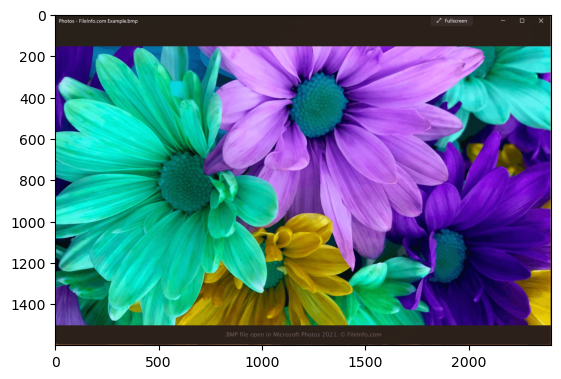

In [5]:
plt.imshow(image)
image.shape

In [6]:
downsampled_image = image[::10, ::10]

(160, 240, 3)

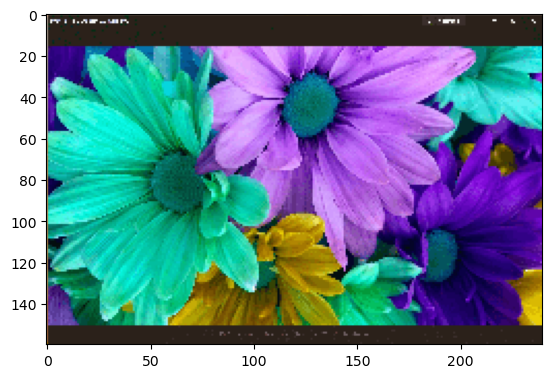

In [7]:
plt.imshow(downsampled_image)
downsampled_image.shape


In [8]:
def nearest_neighbor_interpolation(image, scale_factor):
    original_height, original_width = image.shape
    
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)
    
    new_image = np.zeros((new_height, new_width), dtype=image.dtype)
    
    for i in range(new_height):
        for j in range(new_width):
            x = round(i / scale_factor)
            y = round(j / scale_factor)
            
            x = min(x, original_height - 1)
            y = min(y, original_width - 1)
            
            new_image[i, j] = image[x, y]
    
    return new_image
image = cv2.imread("/home/nalin/Downloads/bmp_13.webp", cv2.IMREAD_GRAYSCALE)

scale_factor = 2
resized_image_int = nearest_neighbor_interpolation(image, scale_factor)

In [9]:
resized_image_int.shape

(3198, 4800)

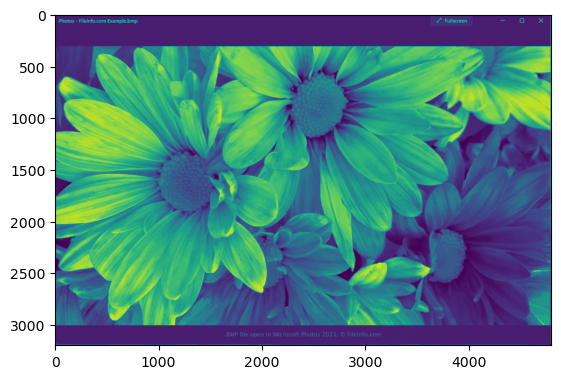

In [10]:
plt.imshow(resized_image_int)

In [14]:
def nearest_neighbor_interpolation_rgb(image, scale_factor):
    original_height, original_width, num_channels = image.shape
    
    new_height = int(original_height * scale_factor)
    new_width = int(original_width * scale_factor)
    
    new_image = np.zeros((new_height, new_width, num_channels), dtype=image.dtype)
    
    for c in range(num_channels):  
        for i in range(new_height):
            for j in range(new_width):
                x = round(i / scale_factor)
                y = round(j / scale_factor)
                
                x = min(x, original_height - 1)
                y = min(y, original_width - 1)
                
                new_image[i, j, c] = image[x, y, c]
    
    return new_image

image = cv2.imread("/home/nalin/Downloads/bmp_13.webp", cv2.IMREAD_COLOR)  
scale_factor = 2  
resized_image_rgb = nearest_neighbor_interpolation_rgb(image, scale_factor)


In [52]:
resized_image_rgb.shape

(3198, 4800, 3)

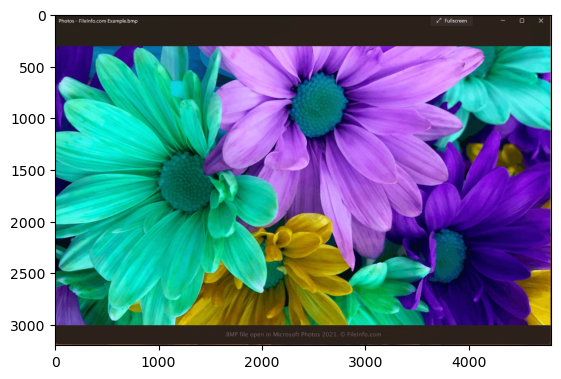

In [54]:
plt.imshow(resized_image_rgb)

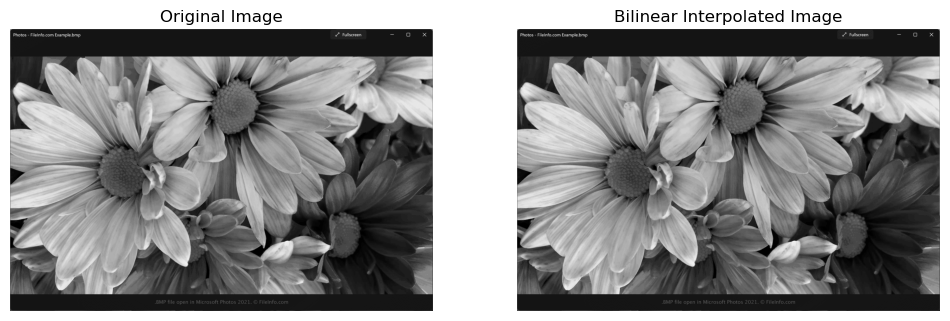

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Bilinear interpolation function
def bilinear_interpolation(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape
    
    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    # Create an empty array for the new image
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)
    
    # Iterate through each pixel in the new image
    for i in range(new_height):
        for j in range(new_width):
            # Map the pixel back to the original image space
            x = j / scale_x
            y = i / scale_y
            
            # Find the coordinates of the four surrounding pixels
            x1 = int(np.floor(x))
            x2 = min(x1 + 1, original_width - 1)  # Ensure x2 is within bounds
            y1 = int(np.floor(y))
            y2 = min(y1 + 1, original_height - 1)  # Ensure y2 is within bounds
            
            # Calculate the differences
            dx = x - x1
            dy = y - y1
            
            # Perform bilinear interpolation
            pixel_value = (1 - dx) * (1 - dy) * img[y1, x1] + \
                          dx * (1 - dy) * img[y1, x2] + \
                          (1 - dx) * dy * img[y2, x1] + \
                          dx * dy * img[y2, x2]
            
            # Assign the interpolated value to the new image
            new_img[i, j] = int(pixel_value)
    
    return new_img

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply bilinear interpolation
resized_image = bilinear_interpolation(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bilinear Interpolated Image')
plt.axis('off')

plt.show()


In [45]:
resized_image.size , resized_image.shape

(15350400, (3198, 4800))

In [46]:
image.size

3837600

In [55]:
image_bilinear =  bilinear_interpolation(resized_image, scale_x, scale_y)

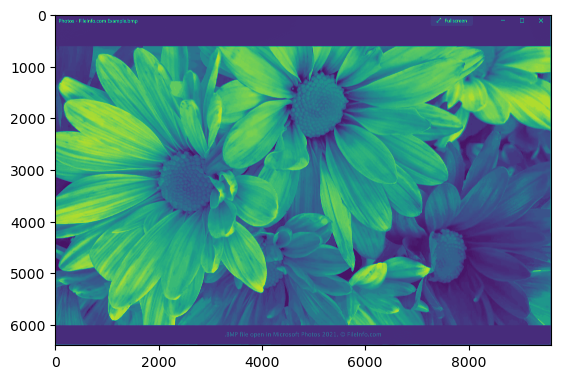

In [56]:
plt.imshow(image_bilinear)

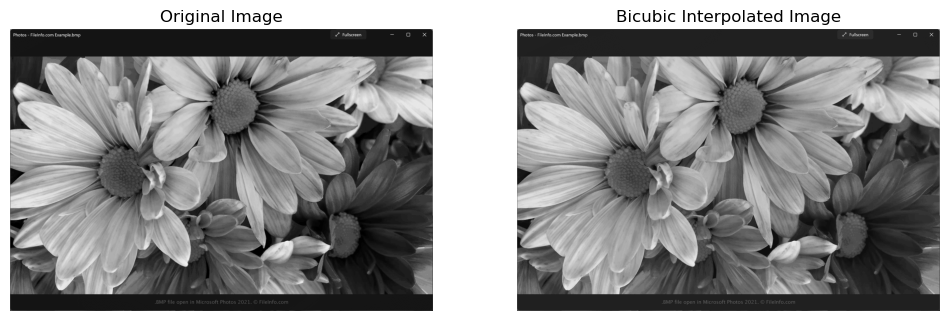

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cubic interpolation function
def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

# Bicubic interpolation function
def bicubic_interpolation(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape

    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    # Create an empty array for the new image
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Iterate through each pixel in the new image
    for i in range(new_height):
        for j in range(new_width):
            # Map the pixel back to the original image space
            x = j / scale_x
            y = i / scale_y

            # Find the coordinates of the surrounding 4x4 neighborhood
            x1 = int(np.floor(x))
            y1 = int(np.floor(y))

            # Compute the interpolation for a 4x4 neighborhood
            interpolated_value = 0
            for m in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                for n in range(-1, 3):  # -1 to 2 for a total of 4 pixels
                    # Get the pixel coordinates in the original image
                    xm = min(max(x1 + m, 0), original_width - 1)
                    yn = min(max(y1 + n, 0), original_height - 1)

                    # Calculate the weight using the cubic function
                    weight = cubic(x - (x1 + m)) * cubic(y - (y1 + n))

                    # Accumulate the interpolated value
                    interpolated_value += img[yn, xm] * weight

            # Assign the interpolated value to the new image
            new_img[i, j] = np.clip(interpolated_value, 0, 255)

    return new_img

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply bicubic interpolation
resized_image = bicubic_interpolation(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bicubic Interpolated Image')
plt.axis('off')

plt.show()


In [21]:
resized_image.shape,resized_image.size

((3198, 4800), 15350400)

In [50]:
image.shape,image.size

((1599, 2400), 3837600)

In [51]:
image_bicubic = bicubic_interpolation(image, scale_x, scale_y)

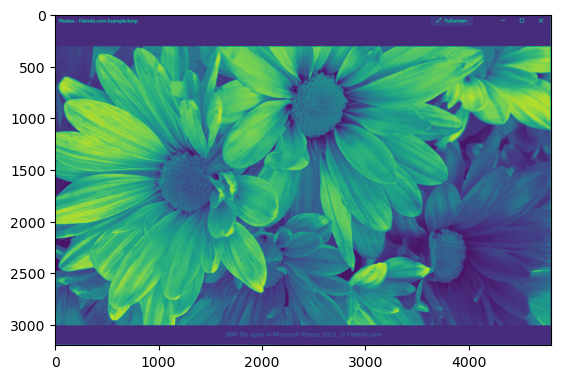

In [53]:
plt.imshowowow(image_bicubic)

In [1]:
# Edge detection function using Sobel filter
def apply_edge_detection(image):
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))
    return sobel_edge

# Apply edge detection to each interpolated image
edge_nearest = apply_edge_detection(image_nearest)
edge_bilinear = apply_edge_detection(image_bilinear)
edge_bicubic = apply_edge_detection(image_bicubic)


NameError: name 'image_nearest' is not defined

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Edge detection function using Sobel filter
def apply_edge_detection(image):
    # Apply Sobel filter to detect edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

    # Calculate the magnitude of the gradient
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))  # Convert to uint8 format

    return sobel_edge

# Function to plot the image and its histogram
def plot_image_and_histogram(image, title):
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{title} Image')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f'{title} Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.show()

# Load or generate interpolated images using nearest neighbor, bilinear, and bicubic methods
# Example: Replace these with actual interpolated images from previous steps

# Example images (replace these with your interpolated images)
image_nearest = cv2.imread('image_nearest.jpg', cv2.IMREAD_GRAYSCALE)  # Nearest-neighbor interpolated image
image_bilinear = cv2.imread('image_bilinear.jpg', cv2.IMREAD_GRAYSCALE)  # Bilinear interpolated image
image_bicubic = cv2.imread('image_bicubic.jpg', cv2.IMREAD_GRAYSCALE)  # Bicubic interpolated image

# Apply edge detection for each interpolated image
edge_nearest = apply_edge_detection(image_nearest)
edge_bilinear = apply_edge_detection(image_bilinear)
edge_bicubic = apply_edge_detection(image_bicubic)

# Plot images and histograms for each result
plot_image_and_histogram(edge_nearest, 'Edge Nearest-Neighbor')
plot_image_and_histogram(edge_bilinear, 'Edge Bilinear')
plot_image_and_histogram(edge_bicubic, 'Edge Bicubic')

# Verify dimensions
print("Nearest-Neighbor Image Dimensions:", edge_nearest.shape)
print("Bilinear Image Dimensions:", edge_bilinear.shape)
print("Bicubic Image Dimensions:", edge_bicubic.shape)


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from numpy.parallel import parallel

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Define the bilinear interpolation function
def bilinear_interpolation_chunk(chunk):
    # Perform bilinear interpolation on the chunk
    resized_chunk = np.zeros((chunk.shape[0] * scale_y, chunk.shape[1] * scale_x), dtype=np.uint8)
    for i in range(chunk.shape[0]):
        for j in range(chunk.shape[1]):
            x = j / scale_x
            y = i / scale_y
            x1 = int(np.floor(x))
            x2 = min(x1 + 1, chunk.shape[1] - 1)
            y1 = int(np.floor(y))
            y2 = min(y1 + 1, chunk.shape[0] - 1)
            dx = x - x1
            dy = y - y1
            pixel_value = (1 - dx) * (1 - dy) * chunk[y1, x1] + \
                          dx * (1 - dy) * chunk[y1, x2] + \
                          (1 - dx) * dy * chunk[y2, x1] + \
                          dx * dy * chunk[y2, x2]
            resized_chunk[i * scale_y, j * scale_x] = int(pixel_value)
    return resized_chunk

# Divide the image into chunks
chunk_size = 256
chunks = [image[i:i+chunk_size, j:j+chunk_size] for i in range(0, image.shape[0], chunk_size) for j in range(0, image.shape[1], chunk_size)]

# Parallelize the bilinear interpolation process
with parallel():
    resized_chunks = [bilinear_interpolation_chunk(chunk) for chunk in chunks]

# Combine the resized chunks
resized_image = np.zeros((image.shape[0] * scale_y, image.shape[1] * scale_x), dtype=np.uint8)
for i, chunk in enumerate(chunks):
    resized_image[i*chunk_size*scale_y:(i+1)*chunk_size*scale_y, i*chunk_size*scale_x:(i+1)*chunk_size*scale_x] = resized_chunks[i]

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')

ModuleNotFoundError: No module named 'numpy.parallel'

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a CUDA-enabled OpenCV context
cv2.cuda.setDevice(0)  # Select the GPU device (0 is the default)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Upload the image to the GPU
gpu_image = cv2.cuda_GpuMat()
gpu_image.upload(image)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply bilinear interpolation using OpenCV's GPU acceleration
resized_gpu_image = cv2.cuda.resize(gpu_image, (int(image.shape[1] * scale_x), int(image.shape[0] * scale_y)), interpolation=cv2.INTER_LINEAR)

# Download the resized image from the GPU
resized_image = resized_gpu_image.download()

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bilinear Interpolated Image')
plt.axis('off')

plt.show()

error: OpenCV(4.7.0) /io/opencv/modules/core/include/opencv2/core/private.cuda.hpp:106: error: (-216:No CUDA support) The library is compiled without CUDA support in function 'throw_no_cuda'


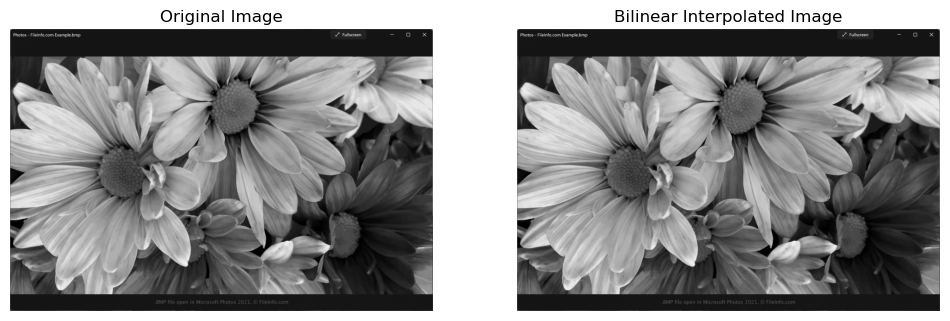

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 1, 1  # Example: scaling by a factor of 2

# Define the bilinear interpolation function
def bilinear_interpolation_chunk(chunk):
    # Perform bilinear interpolation on the chunk
    resized_chunk = np.zeros((chunk.shape[0] * scale_y, chunk.shape[1] * scale_x), dtype=np.uint8)
    for i in range(chunk.shape[0]):
        for j in range(chunk.shape[1]):
            x = j / scale_x
            y = i / scale_y
            x1 = int(np.floor(x))
            x2 = min(x1 + 1, chunk.shape[1] - 1)
            y1 = int(np.floor(y))
            y2 = min(y1 + 1, chunk.shape[0] - 1)
            dx = x - x1
            dy = y - y1
            pixel_value = (1 - dx) * (1 - dy) * chunk[y1, x1] + \
                          dx * (1 - dy) * chunk[y1, x2] + \
                          (1 - dx) * dy * chunk[y2, x1] + \
                          dx * dy * chunk[y2, x2]
            resized_chunk[i * scale_y, j * scale_x] = int(pixel_value)
    return resized_chunk

# Divide the image into chunks
chunk_size = 256
chunks = [image[i:i+chunk_size, j:j+chunk_size] for i in range(0, image.shape[0], chunk_size) for j in range(0, image.shape[1], chunk_size)]

# Parallelize the bilinear interpolation process
with ThreadPoolExecutor() as executor:
    resized_chunks = list(executor.map(bilinear_interpolation_chunk, chunks))

# Combine the resized chunks
resized_image = np.zeros((image.shape[0] * scale_y, image.shape[1] * scale_x), dtype=np.uint8)
index = 0
for i in range(0, image.shape[0], chunk_size):
    for j in range(0, image.shape[1], chunk_size):
        resized_image[i*scale_y:(i+chunk_size)*scale_y, j*scale_x:(j+chunk_size)*scale_x] = resized_chunks[index]
        index += 1

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image, cmap='gray')
plt.title('Bilinear Interpolated Image')
plt.axis('off')

plt.show()

In [17]:
resized_image.size

3837600

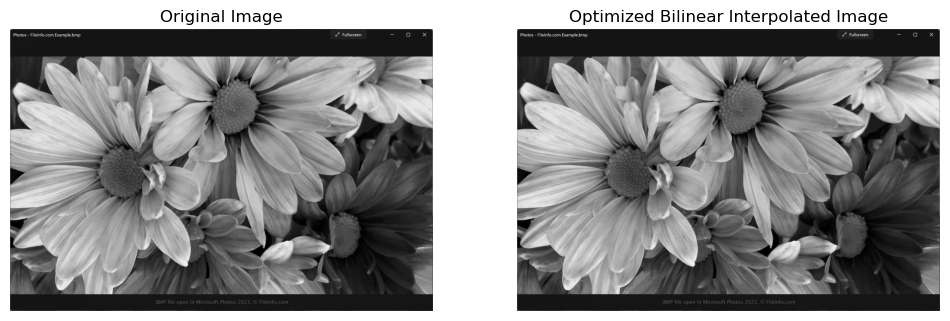

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def bilinear_interpolation_optimized(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape
    
    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)
    
    # Create grid of coordinates in the new image
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    # Floor the coordinates to get integer positions
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)
    
    # Ensure x1, y1 are within bounds
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)
    
    # Create 2D grids of x1, x2, y1, y2, dx, and dy using the new image's grid shape
    X, Y = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    Dx, Dy = np.meshgrid(x - x1, y - y1)
    
    # Extract pixel values
    Q11 = img[Y, X]
    Q21 = img[Y, X2]
    Q12 = img[Y2, X]
    Q22 = img[Y2, X2]
    
    # Perform bilinear interpolation
    new_img = (1 - Dx) * (1 - Dy) * Q11 + Dx * (1 - Dy) * Q21 + \
              (1 - Dx) * Dy * Q12 + Dx * Dy * Q22
    
    return new_img.astype(np.uint8)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply optimized bilinear interpolation
resized_image_bil = bilinear_interpolation_optimized(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bil, cmap='gray')
plt.title('Optimized Bilinear Interpolated Image')
plt.axis('off')

plt.show()



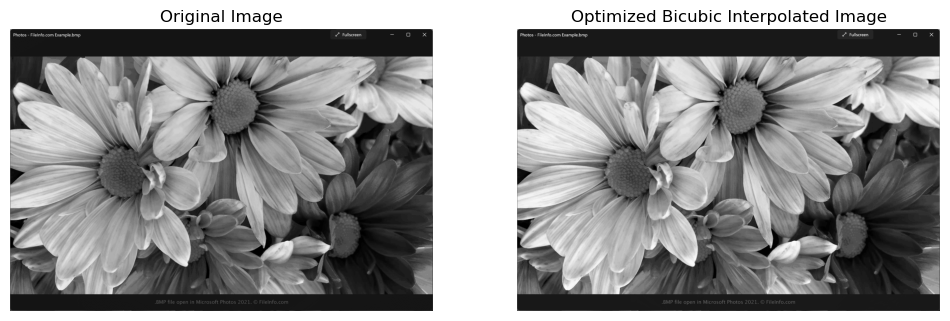

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Cubic interpolation function
def cubic(x):
    abs_x = np.abs(x)
    abs_x2 = abs_x ** 2
    abs_x3 = abs_x ** 3

    # Cubic interpolation formula
    f = np.where(abs_x <= 1, 
                 1.5 * abs_x3 - 2.5 * abs_x2 + 1,
                 np.where(abs_x <= 2, 
                          -0.5 * abs_x3 + 2.5 * abs_x2 - 4 * abs_x + 2, 
                          0))
    return f

# Bicubic interpolation function (vectorized)
def bicubic_interpolation_optimized(img, scale_x, scale_y):
    # Original dimensions
    original_height, original_width = img.shape

    # New dimensions
    new_height, new_width = int(original_height * scale_y), int(original_width * scale_x)

    # Create an empty array for the new image
    new_img = np.zeros((new_height, new_width), dtype=np.uint8)

    # Generate coordinate grids for new image
    x = np.arange(new_width) / scale_x
    y = np.arange(new_height) / scale_y
    
    # Compute the coordinates in the original image space
    x1 = np.floor(x).astype(int)
    y1 = np.floor(y).astype(int)

    # Ensure coordinates are within bounds
    x2 = np.clip(x1 + 1, 0, original_width - 1)
    y2 = np.clip(y1 + 1, 0, original_height - 1)

    # Calculate differences
    dx = x - x1
    dy = y - y1

    # Create meshgrids
    X1, Y1 = np.meshgrid(x1, y1)
    X2, Y2 = np.meshgrid(x2, y2)
    DX, DY = np.meshgrid(dx, dy)

    # Extract pixel values
    Q11 = img[Y1, X1]
    Q21 = img[Y1, X2]
    Q12 = img[Y2, X1]
    Q22 = img[Y2, X2]

    # Perform cubic interpolation
    weight_x1 = cubic(DX)
    weight_x2 = cubic(1 - DX)
    weight_y1 = cubic(DY)
    weight_y2 = cubic(1 - DY)

    new_img = (weight_x1 * weight_y1 * Q11 +
               weight_x2 * weight_y1 * Q21 +
               weight_x1 * weight_y2 * Q12 +
               weight_x2 * weight_y2 * Q22)
    
    return np.clip(new_img, 0, 255).astype(np.uint8)

# Read the image in grayscale
image = cv2.imread('/home/nalin/Downloads/bmp_13.webp', cv2.IMREAD_GRAYSCALE)

# Scale factors
scale_x, scale_y = 2, 2  # Example: scaling by a factor of 2

# Apply optimized bicubic interpolation
resized_image_bic = bicubic_interpolation_optimized(image, scale_x, scale_y)

# Display the original and interpolated images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_image_bic, cmap='gray')
plt.title('Optimized Bicubic Interpolated Image')
plt.axis('off')

plt.show()


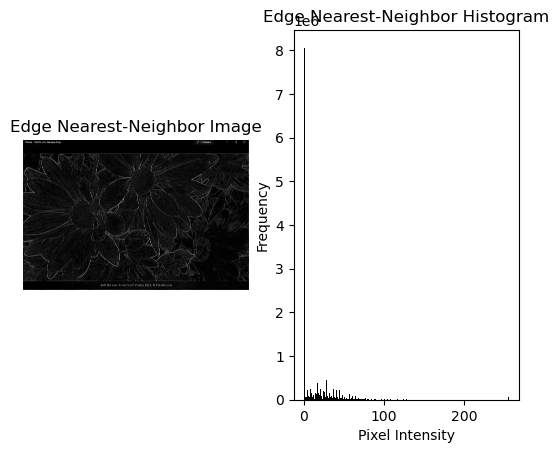

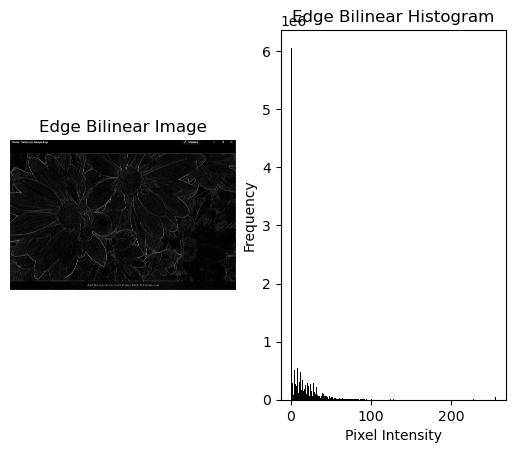

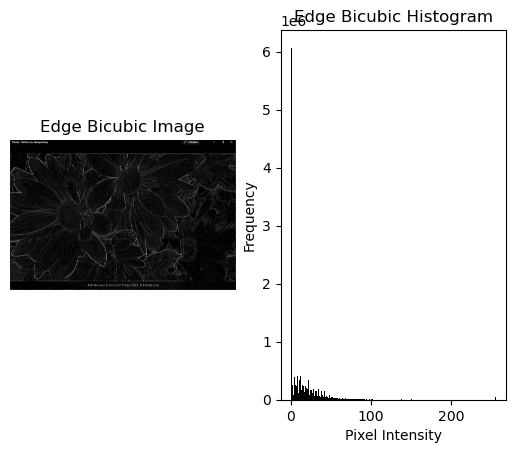

Nearest-Neighbor Image Dimensions: (3198, 4800)
Bilinear Image Dimensions: (3198, 4800)
Bicubic Image Dimensions: (3198, 4800)


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Edge detection function using Sobel filter
def apply_edge_detection(image):
    # Apply Sobel filter to detect edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

    # Calculate the magnitude of the gradient
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))  # Convert to uint8 format

    return sobel_edge

# Function to plot the image and its histogram
def plot_image_and_histogram(image, title):
    # Plot the image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title(f'{title} Image')
    plt.axis('off')

    # Plot the histogram
    plt.subplot(1, 2, 2)
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='black')
    plt.title(f'{title} Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')

    plt.show()

# Load or generate interpolated images using nearest neighbor, bilinear, and bicubic methods
# Example: Replace these with actual interpolated images from previous steps


# Apply edge detection to each interpolated image
edge_nearest = apply_edge_detection(resized_image_int)
edge_bilinear = apply_edge_detection(resized_image_bil)
edge_bicubic = apply_edge_detection(resized_image_bic)


# Plot images and histograms for each result
plot_image_and_histogram(edge_nearest, 'Edge Nearest-Neighbor')
plot_image_and_histogram(edge_bilinear, 'Edge Bilinear')
plot_image_and_histogram(edge_bicubic, 'Edge Bicubic')

# Verify dimensions
print("Nearest-Neighbor Image Dimensions:", edge_nearest.shape)
print("Bilinear Image Dimensions:", edge_bilinear.shape)
print("Bicubic Image Dimensions:", edge_bicubic.shape)


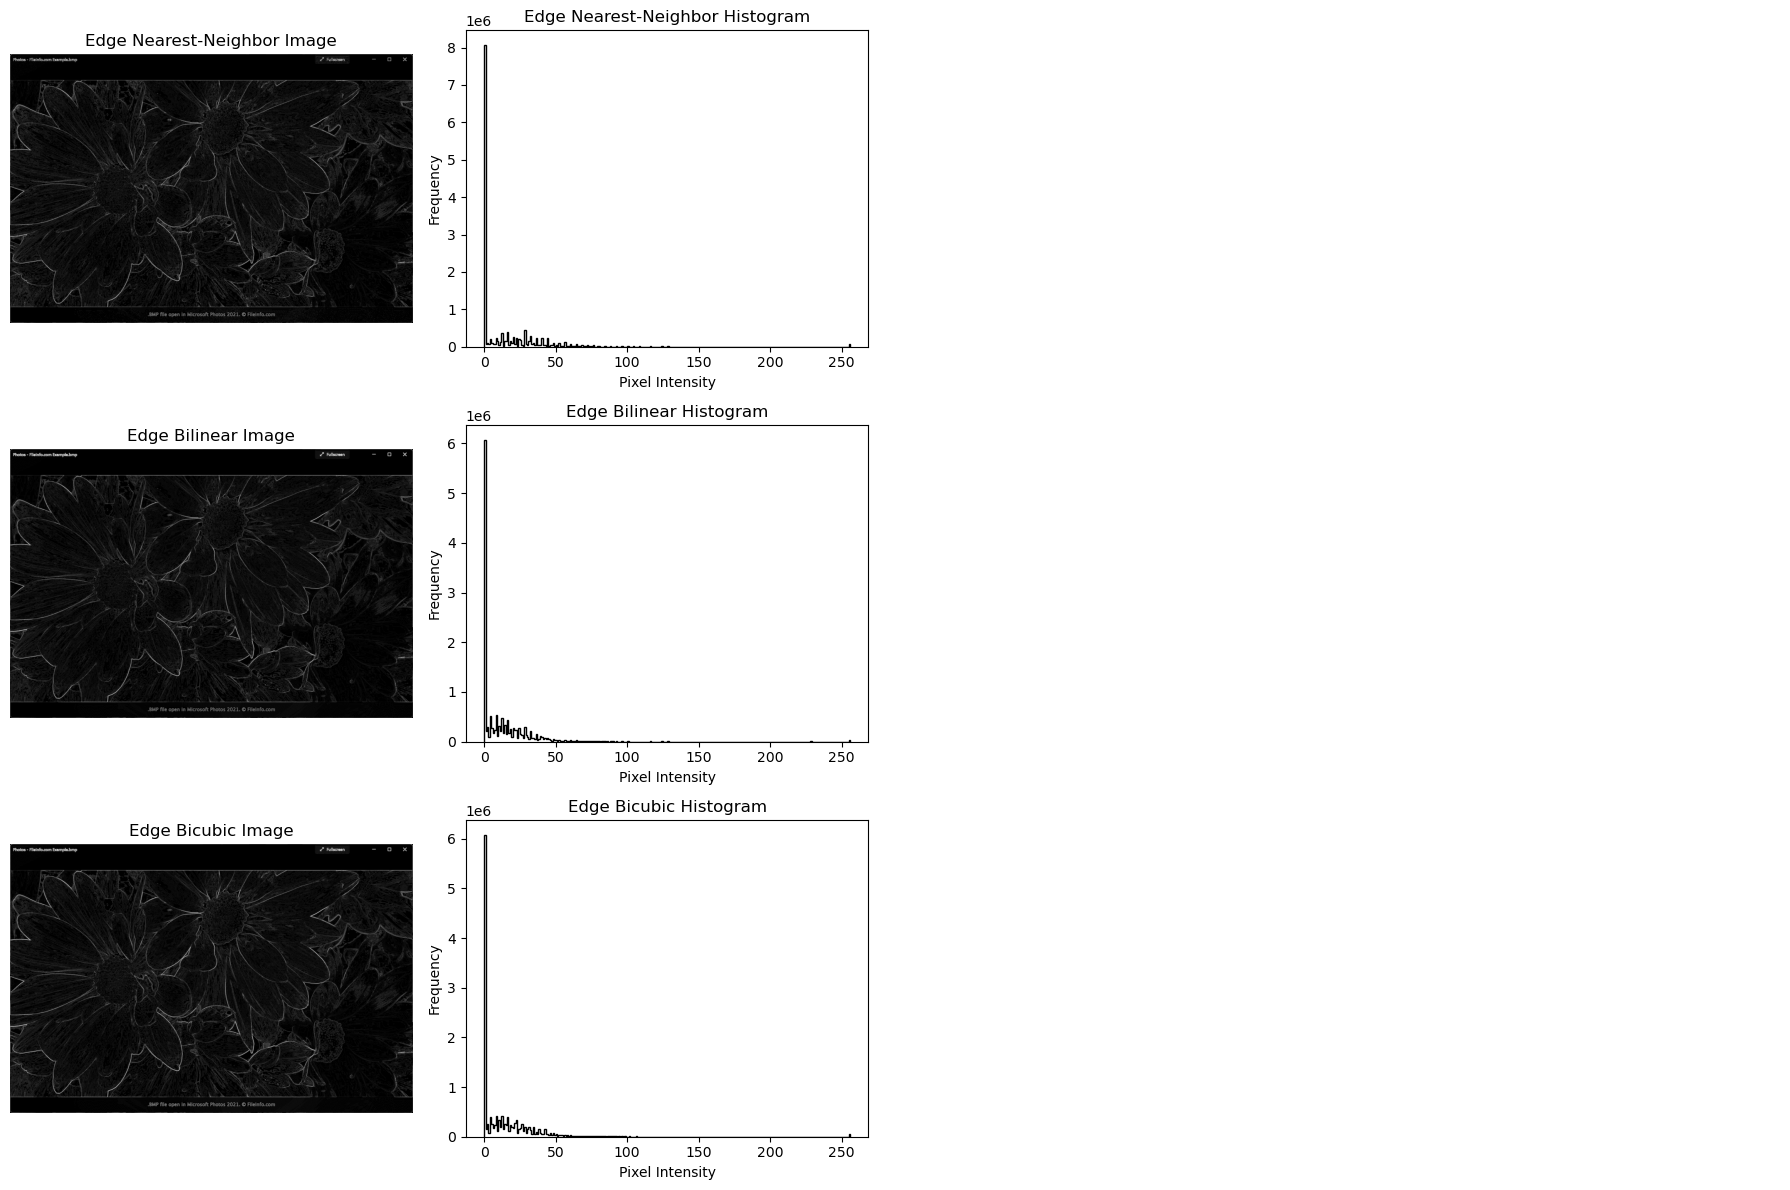

Nearest-Neighbor Image Dimensions: (3198, 4800)
Bilinear Image Dimensions: (3198, 4800)
Bicubic Image Dimensions: (3198, 4800)


In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Edge detection function using Sobel filter
def apply_edge_detection(image):
    # Apply Sobel filter to detect edges
    sobel_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)  # Sobel in X direction
    sobel_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)  # Sobel in Y direction

    # Calculate the magnitude of the gradient
    sobel_edge = np.sqrt(sobel_x**2 + sobel_y**2)
    sobel_edge = np.uint8(np.clip(sobel_edge, 0, 255))  # Convert to uint8 format

    return sobel_edge

# Function to plot the image and its histogram with improved aesthetics
def plot_image_and_histogram(image, title, ax_img, ax_hist):
    # Plot the image
    ax_img.imshow(image, cmap='gray')
    ax_img.set_title(f'{title} Image')
    ax_img.axis('off')

    # Plot the histogram
    ax_hist.hist(image.ravel(), bins=256, range=[0, 256], color='black', histtype='step')
    ax_hist.set_title(f'{title} Histogram')
    ax_hist.set_xlabel('Pixel Intensity')
    ax_hist.set_ylabel('Frequency')

# Load or generate interpolated images using nearest neighbor, bilinear, and bicubic methods
# Example: Replace these with actual interpolated images from previous steps

# Apply edge detection to each interpolated image
edge_nearest = apply_edge_detection(resized_image_int)
edge_bilinear = apply_edge_detection(resized_image_bil)
edge_bicubic = apply_edge_detection(resized_image_bic)

# Create a figure with subplots
fig, axs = plt.subplots(3, 4, figsize=(18, 12))

# Plot images and histograms for each result
plot_image_and_histogram(edge_nearest, 'Edge Nearest-Neighbor', axs[0, 0], axs[0, 1])
plot_image_and_histogram(edge_bilinear, 'Edge Bilinear', axs[1, 0], axs[1, 1])
plot_image_and_histogram(edge_bicubic, 'Edge Bicubic', axs[2, 0], axs[2, 1])

# Add titles to empty plots to fill the grid
for i in range(3):
    axs[i, 2].axis('off')
    axs[i, 3].axis('off')

# Display the plots
plt.tight_layout()
plt.show()

# Verify dimensions
print("Nearest-Neighbor Image Dimensions:", edge_nearest.shape)
print("Bilinear Image Dimensions:", edge_bilinear.shape)
print("Bicubic Image Dimensions:", edge_bicubic.shape)
